In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ECOv003_L3T_L4T_JET import load_ECOv002_calval_JET_outputs, INPUT_VARIABLES

In [2]:
df = load_ECOv002_calval_JET_outputs()
df

,Unnamed: 0,ID,vegetation,climate,STICinst,BESSinst,MOD16inst,PTJPLSMinst,ETinst,ETinstUncertainty,...,ET_daylight_PMJPL_kg,G_PMJPL_Wm2,G_Wm2,LE_instantaneous_Wm2,ET_daylight_kg,ET_uncertainty,GPP_inst_g_m2_s,ET_canopy_inst_kg_m2_s,WUE,AuxiliaryNWP
0,0,US-NC3,ENF,Cfa,270.345200,78.53355,392.851840,307.021970,487.383423,118.916280,...,3.933367,60.425858,60.425858,351.448461,4.144935,0.773774,0.000212,0.000109,1.943556,NaN
1,1,US-Mi3,CVM,Dfb,232.141600,229.20093,640.118470,375.089300,106.825577,167.919460,...,3.776753,99.328964,99.328964,326.039533,4.279363,1.239315,0.000269,0.000111,2.421845,NaN
2,2,US-Mi3,CVM,Dfb,356.355740,335.23154,625.661700,284.686250,NaN,132.936340,...,3.507920,94.519459,94.519459,335.227024,4.353823,0.920482,0.000251,0.000044,5.670131,NaN
3,3,US-Mi3,CVM,Dfb,332.938400,326.68680,624.254330,251.414490,178.827545,141.132420,...,3.951060,78.277108,78.277108,332.815927,4.433066,0.372526,0.000303,0.000049,6.158837,NaN
4,4,US-Mi3,CVM,Dfb,286.854030,237.21654,511.082180,228.520170,154.791626,114.809410,...,4.161007,70.628272,70.628272,290.934683,4.244395,0.368856,0.000283,0.000058,4.846558,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,US-xAE,GRA,Cfa,70.923310,172.37459,81.645230,15.282976,NaN,56.385185,...,0.077304,5.985288,5.985288,35.172955,0.423263,0.427738,0.000006,0.000008,0.723558,NaN
1061,1061,US-xAE,GRA,Cfa,116.543190,121.81641,65.469320,22.186659,NaN,40.509410,...,0.009255,23.006297,23.006297,37.569789,0.815034,1.326901,0.000015,0.000012,1.260016,NaN
1062,1062,US-xAE,GRA,Cfa,129.880100,0.00000,118.777240,55.343586,NaN,52.403820,...,0.000800,43.185134,43.185134,27.267393,0.585193,0.710205,0.000041,0.000031,1.332510,NaN
1063,1063,US-xAE,GRA,Cfa,2.707851,140.38632,126.490524,40.434025,NaN,57.769722,...,0.034298,28.164673,28.164673,58.151051,1.076441,0.606770,0.000024,0.000023,1.048858,NaN


In [3]:
[column for column in df.columns if "insitu" in column]

['insitu_LE_Wm2',
 'insitu_H_Wm2',
 'insitu_Rn_Wm2',
 'insitu_G_Wm2',
 'insitu_SWin_Wm2',
 'insitu_Ta_C',
 'insitu_RH',
 'insitu_Rn_daylight_Wm2',
 'insitu_LE_daylight_Wm2',
 'insitu_ET_daylight_kg']

In [4]:
df["Ta_C_error"] = df["Ta_C"] - df["insitu_Ta_C"]
df[["Ta_C", "insitu_Ta_C", "Ta_C_error"]].head()

,Ta_C,insitu_Ta_C,Ta_C_error
0,32.658920,31.80107,0.857850
1,24.227982,26.23260,-2.004618
2,26.178862,30.26300,-4.084138
3,22.527096,23.63330,-1.106204
4,23.280691,24.33430,-1.053609


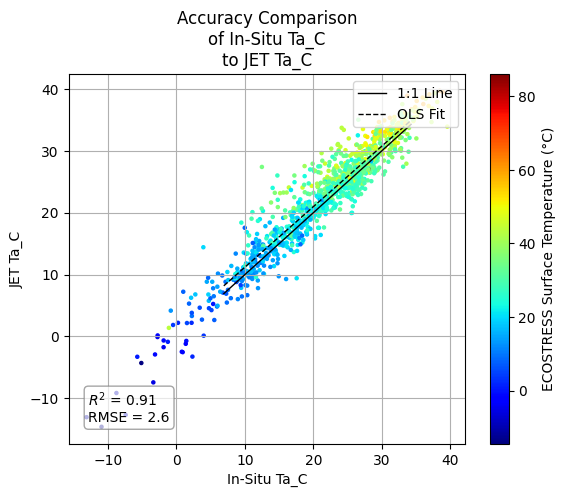

In [5]:
model_name = "JET"
x_variable = "insitu_Ta_C"
y_variable = "Ta_C"

# Filter out rows with NaN values in either variable
valid_data = df[[x_variable, y_variable, 'ST_C']].dropna()

sc = plt.scatter(
    x=valid_data[x_variable],
    y=valid_data[y_variable],
    c=valid_data.ST_C,
    cmap="jet",
    color=None,
    s=5
)

# Calculate 5% and 95% tails for x and y variables
x_5th, x_95th = np.percentile(valid_data[x_variable], [5, 95])
y_5th, y_95th = np.percentile(valid_data[y_variable], [5, 95])

min_val = min(x_5th, y_5th)
max_val = max(x_95th, y_95th)

# Add 1-to-1 line
# min_val = min(valid_data[x_variable].min(), valid_data[y_variable].min())
# max_val = max(valid_data[x_variable].max(), valid_data[y_variable].max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=1, label='1:1 Line')

# Add OLS regression line
coefs = np.polyfit(valid_data[x_variable], valid_data[y_variable], 1)
ols_x = np.array([min_val, max_val])
ols_y = coefs[0] * ols_x + coefs[1]
plt.plot(ols_x, ols_y, color='black', linestyle='--', linewidth=1, label='OLS Fit')

# Calculate R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
y_true = valid_data[y_variable]
y_pred = coefs[0] * valid_data[x_variable] + coefs[1]
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Annotate R-squared and RMSE on plot in lower left corner
plt.annotate(f"$R^2$ = {r2:.2f}\nRMSE = {rmse:.1f}",
            xy=(0.05, 0.05), xycoords='axes fraction',
            ha='left', va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.7))

plt.grid(True, zorder=0) 
plt.xlabel(f"In-Situ {y_variable}")
plt.ylabel(f"{model_name} {y_variable}")
plt.title(f"Accuracy Comparison\nof In-Situ {y_variable}\nto {model_name} {y_variable}")
plt.colorbar(sc, label="ECOSTRESS Surface Temperature (°C)")
plt.legend(loc='upper right')

plt.show()

Dropped 'elevation_km' column from analysis
Removed 21 redundant columns
Redundant columns removed: ['AirTempC', 'Elev', 'EmisWB', 'G_PMJPL_Wm2', 'G_PTJPLSM', 'G_STIC_Wm2', 'G_filt', 'Hcorr50', 'LE', 'LE_Wm2', 'LEcorr50', 'LST', 'Lat', 'Long', 'NETRAD_filt', 'RH_percentage', 'Rn_Wm2', 'SW_IN', 'SWin_Wm2', 'Ta', 'gl_sh']

Stored top 10 positive correlations in 'top_positive_correlations'
Stored top 10 negative correlations in 'top_negative_correlations'

TOP 20 STRONGEST CORRELATIONS WITH Ta_C_error
(Float Columns Only, Redundant Columns Removed)

Top 10 Positive Correlations:
elevation_m                 0.460818
carbon_uptake_efficiency    0.424642
kn                          0.424642
ball_berry_intercept_C3     0.397332
ball_berry_slope_C4         0.386962
G_Wm2                       0.350615
NIR_Wm2                     0.310576
UV_Wm2                      0.298053
SWin_FLiES_ANN_raw          0.296964
Rg                          0.283965
Name: Ta_C_error, dtype: float64

-------------

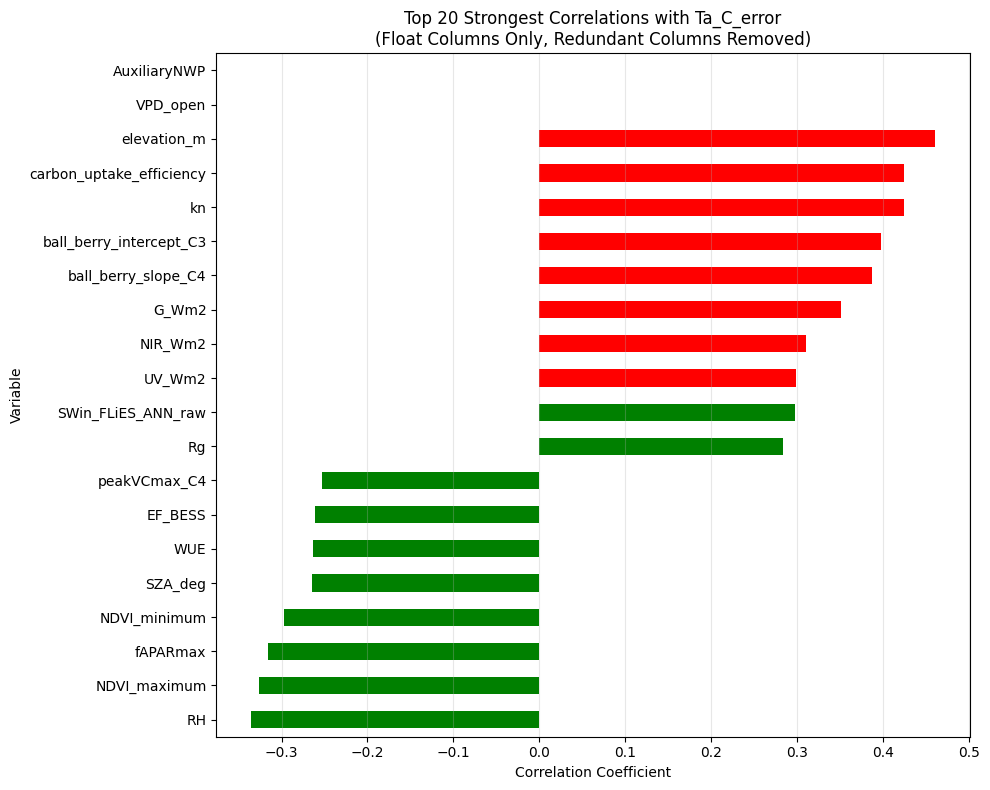

In [6]:
# Discover top strongest correlations with Ta_C_error
import seaborn as sns
import pandas as pd

top_n = 20  # Number of top correlations to display

# Select only floating point columns
float_columns = df.select_dtypes(include=['float64', 'float32']).columns.tolist()

# Drop elevation_km column
if 'elevation_km' in float_columns:
    float_columns.remove('elevation_km')
    print("Dropped 'elevation_km' column from analysis")

# Eliminate redundant columns (keep only the right-most of each identical set)
float_df = df[float_columns].copy()
columns_to_remove = set()

for i in range(len(float_columns)):
    if float_columns[i] in columns_to_remove:
        continue
    
    # Check if this column is identical to any column to its right
    for j in range(i + 1, len(float_columns)):
        if float_df[float_columns[i]].equals(float_df[float_columns[j]]):
            columns_to_remove.add(float_columns[i])
            break

columns_to_keep = [col for col in float_columns if col not in columns_to_remove]

print(f"Removed {len(columns_to_remove)} redundant columns")
if columns_to_remove:
    print(f"Redundant columns removed: {sorted(columns_to_remove)}")
print()

# Use only non-redundant columns
float_df = float_df[columns_to_keep]

# Calculate Pearson correlations with Ta_C_error (only for float columns)
correlations = float_df.corr()['Ta_C_error'].drop('Ta_C_error').sort_values(ascending=False)

# Store top correlations and anti-correlations for future use
top_positive_correlations = correlations.head(top_n//2)
top_negative_correlations = correlations.tail(top_n//2)

print(f"Stored top {top_n//2} positive correlations in 'top_positive_correlations'")
print(f"Stored top {top_n//2} negative correlations in 'top_negative_correlations'")
print()

# Display top correlations
print("=" * 60)
print(f"TOP {top_n} STRONGEST CORRELATIONS WITH Ta_C_error")
print("(Float Columns Only, Redundant Columns Removed)")
print("=" * 60)
print(f"\nTop {top_n//2} Positive Correlations:")
print(top_positive_correlations)
print("\n" + "-" * 60)
print(f"\nTop {top_n//2} Negative Correlations:")
print(top_negative_correlations)

# Visualize top n correlations (positive and negative combined)
fig, ax = plt.subplots(figsize=(10, 8))
top_correlations = pd.concat([top_positive_correlations, top_negative_correlations])
colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
top_correlations.sort_values().plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Variable')
ax.set_title(f'Top {top_n} Strongest Correlations with Ta_C_error\n(Float Columns Only, Redundant Columns Removed)')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print("Top positive correlations with Ta_C_error:")
print(top_positive_correlations)

print("\nTop negative correlations with Ta_C_error:")
print(top_negative_correlations)